<a href="https://colab.research.google.com/github/hemrajojha/CSC410/blob/main/data_attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#source --> https://www.rkuhler.com/blog/chapter-2-1-data-objects-and-attribute-types/
#Chapter 2.1 provided information about the different types of attributes or features that we can find in data.

In [5]:
import pandas as pd


In [41]:
#setup google drive
from google.colab import drive


In [42]:
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
#can use linux commands
!ls

drive  sample_data


In [49]:
#locate file in google drive (uploaded it separately)
#data source: https://datasets.imdbws.com/
content_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.tsv',sep='\t')

In [52]:
title_file=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titles.tsv',sep='\t',low_memory=False)

In [53]:
#combine two data files
data=pd.merge(title_file,content_file,on="tconst")

In [54]:
#sample data
data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.7,1702
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",6.1,210
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance",6.5,1462
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short",6.2,123
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short",6.2,2262


In [55]:
#Ok, let’s have a look at all of the attributes we have to work with.
data.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes'],
      dtype='object')

In [56]:
#The first type of attribute that the book covers is nominal or categorical attributes. 
#There are some obvious ones here like primaryTitle and genres. 
data['genres'].value_counts()

Drama                            24966
Comedy                           15672
\N                                8715
Adult                             5831
Short                             5251
                                 ...  
Documentary,Drama,Musical            1
History,Romance,Thriller             1
Documentary,Horror,Thriller          1
Action,History,Short                 1
Animation,Documentary,Musical        1
Name: genres, Length: 1411, dtype: int64

In [ ]:
#What genre is the mode here?

In [63]:
#The next type of attribute that the book covers is binary. This would cover true/false type data.
data['isAdult'].value_counts()

0.0    170916
1.0      8628
Name: isAdult, dtype: int64

In [64]:
#The next type of attribute from the book is ordinal. 
#The most obvious example here would be the rating of the movie.
data['averageRating'].value_counts()

6.8    6547
6.2    6533
6.4    6463
6.6    6446
6.5    6242
       ... 
1.4      20
1.3      15
1.2      13
1.1      11
9.9       5
Name: averageRating, Length: 91, dtype: int64

In [ ]:
#These are numerical and can be ordered from worst to best but we wouldn’t say that a 4 star movie is twice as good as a 2 star movie. 
#This type of attribute, while numerical, is still qualitative and not quantitative.

In [83]:
#Next up are “interval-scaled numeric attributes”. 
#We have the movie’s year of release in our data set which is one of the direct example types from the book. 
#we create intervals first
data['startYear'].unique()
data['startYear'].value_counts()

2000    6103
1999    5959
1998    5387
2001    5344
1997    5132
        ... 
2020       6
2018       6
2013       5
2012       4
1893       2
Name: startYear, Length: 132, dtype: int64

In [ ]:
#create time intervals and count the number of movies in every 10 years interval 1894-1904, and so on


In [84]:
#We have many “ratio-scaled numeric attributes” in our data set. 
#Example: the count of ratings.
#Unlike interval-scaled attributes, these have a true zero point and can be compared as ratios of different values. 
data['numVotes'].unique()
data['averageRating'].value_counts()


6.8    6547
6.2    6533
6.4    6463
6.6    6446
6.5    6242
       ... 
1.4      20
1.3      15
1.2      13
1.1      11
9.9       5
Name: averageRating, Length: 91, dtype: int64

In [ ]:
#While my ratings can be said to be “discrete” because they all fall into one of six different buckets. 
#The IMDB rating is closer to a “continuous” attribute because it is an average of the user ratings. 
#However, since they only give us the value rounded to one decimal point, 
#there can only be 100 different possible values so maybe it’s still more like a discrete attribute.

In [85]:
#source: https://www.rkuhler.com/blog/chapter-2-2-basic-statistical-descriptions-of-data/
#visualization
import numpy
import matplotlib
%matplotlib inline

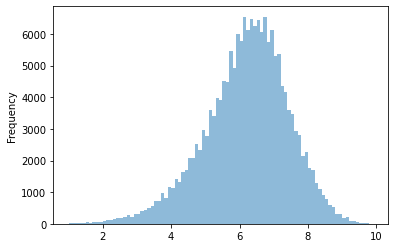

In [87]:
#Previously, we looked at the IMDB rating data as a table but now let’s visualize it with a histogram.
data['averageRating'].plot.hist(
    alpha = 0.5, bins = numpy.arange(1, 10, 0.1))

In [ ]:
#We can see from the histogram above that it has a roughly bell shape like a normal distribution. 
#However, we can also see it is “positively skewed” towards the higher ratings. 
#Just visually inspecting this, I’d guess that it’s “central tendency” is around 6.5. 
#Let’s look at some more precise measures of this attribute. 
#The pandas library makes this simple.

In [88]:
data['averageRating'].describe()

count    179544.000000
mean          6.254137
std           1.220382
min           1.000000
25%           5.500000
50%           6.400000
75%           7.100000
max          10.000000
Name: averageRating, dtype: float64

In [ ]:
So we can see it has a mean of 6.25 and a median of 6.4. 

In [89]:
data['averageRating'].mode()

0    6.8
dtype: float64

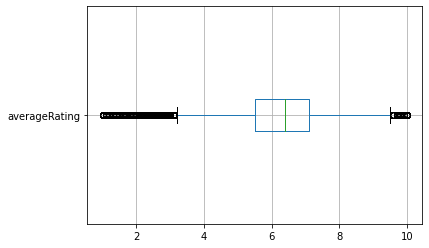

In [90]:
pd.DataFrame.boxplot(
    data, 'averageRating', vert = False, 
    return_type = 'axes')

In [ ]:
#make sense of this box plot

In [91]:
#To get some practice with the pandas libary math functions
import math

In [93]:
print('pandas variance: ' + str(data['averageRating'].var()))
print('pandas standard deviation: ' + str(data['averageRating'].std()))
mean = data['averageRating'].mean()
var = (data['averageRating'].sub(mean).pow(2).sum() / 
       data['averageRating'].count())
std = math.sqrt(var)
print('my variance: ' + str(var))
print('my standard deviation: ' + str(std))

pandas variance: 1.4893330720465505
pandas standard deviation: 1.2203823466629427
my variance: 1.4893247769586018
my standard deviation: 1.2203789480971072


In [ ]:
#what do these numbers mean?

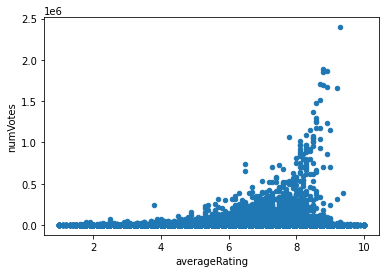

In [95]:
data.plot.scatter('averageRating','numVotes')

In [117]:
!git init

uname ='hemrajojha'
!git config --global user.email 'hemrojha@gmail.com'
!git config --global user.name '$uname'

from getpass import getpass
password = getpass('Password:')
#!git clone https://$uname@github.com/$uname/data-mining
#%cd data-mining
# create a file, then add it to stage
!git add /content/drive/data-attributes.ipynb
!git commit -m 'data attributes'  # commit in Colab
!git push origin master          # push to github

Reinitialized existing Git repository in /content/data-mining/.git/
fatal: pathspec 'data-attributes.ipynb' did not match any files
On branch master

Initial commit

nothing to commit


In [116]:
!git remote rm origin